In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
df_train = pd.read_csv('./train.csv')

In [58]:
#Extend the df by splitting the datetime into new categories
df_train['year'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[0]).astype(str).astype(int)
df_train['month'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[1]).astype(str).astype(int)
df_train['day'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[2]).astype(str).astype(int)
df_train['hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype(str).astype(int)

#Infer Day Name
sr = pd.to_datetime(df_train['datetime']) 
df_train['Day_name'] = sr.dt.day_name()

#Season List 
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_train['Season_Exp'] = df_train['season'].map(season_dict)

#Weather List
weather_dict = {1:'clear' , 2:'mist' , 3:'light_precip' , 4: 'heavy_precip' }
df_train['Weather_Exp'] = df_train['weather'].map(weather_dict)

#Season Reconvert
new_season = {'Spring': 0, 'Winter': 1, 'Summer': 2, 'Fall': 3}
df_train['Season_Reconvert'] = df_train['Season_Exp'].map(new_season)

#Day Reconvert
day_new = {'Sunday': 0, 'Tuesday': 1, 'Wednesday': 1, 'Monday': 1, 'Friday': 1, 'Thursday': 1, 'Saturday': 0}
df_train['weekday'] = df_train['Day_name'].map(day_new)

#Hour Binning
#hour_range = range(0,24)
#bins = ['Night']*6 + ['Morning']*4 + ['Day']*7 + ['Evening']*7
#hour_new = dict(zip(hour_range, bins))
#df_train['Hour_binned'] = df_train['hour'].map(hour_new)

#Hour_Dict_Factorization_Low Level
#factor_hour = {'Night': 0, 'Morning':1, 'Day': 2, 'Evening': 3}
#df_train['Hour_Reconvert'] = df_train['Hour_binned'].map(factor_hour)


In [59]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,Day_name,Season_Exp,Weather_Exp,Season_Reconvert,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2011,1,1,0,Saturday,Spring,clear,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,2011,1,1,1,Saturday,Spring,clear,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,32,2011,1,1,2,Saturday,Spring,clear,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,13,2011,1,1,3,Saturday,Spring,clear,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2011,1,1,4,Saturday,Spring,clear,0,0


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
datetime            10886 non-null object
season              10886 non-null int64
holiday             10886 non-null int64
workingday          10886 non-null int64
weather             10886 non-null int64
temp                10886 non-null float64
atemp               10886 non-null float64
humidity            10886 non-null int64
windspeed           10886 non-null float64
casual              10886 non-null int64
registered          10886 non-null int64
count               10886 non-null int64
year                10886 non-null int64
month               10886 non-null int64
day                 10886 non-null int64
hour                10886 non-null int64
Day_name            10886 non-null object
Season_Exp          10886 non-null object
Weather_Exp         10886 non-null object
Season_Reconvert    10886 non-null int64
weekday             10886 non-null int64
dtypes: float64(3), 

# Polynomial Split for Hour # 

In [61]:
df_train['hour_3'] = df_train['hour']**3
df_train['hour_2'] = df_train['hour']**2

# Categorical and Numerical Split # 

In [62]:
all_columns = list(df_train.columns)

In [63]:
all_columns

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'Day_name',
 'Season_Exp',
 'Weather_Exp',
 'Season_Reconvert',
 'weekday',
 'hour_3',
 'hour_2']

In [77]:
categorical_columns = ['Season_Reconvert','holiday','workingday','weekday','weather', 'year','month', 'hour_2', 'hour_3']
df_train[categorical_columns] = df_train[categorical_columns].astype('category')
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']
train_list = categorical_columns + numerical_columns
train_list


['Season_Reconvert',
 'holiday',
 'workingday',
 'weekday',
 'weather',
 'year',
 'month',
 'hour_2',
 'hour_3',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [78]:
Xtrain = df_train[train_list].drop(['temp','humidity'], axis = 1)

In [79]:
Xtrain.tail()

,Season_Reconvert,holiday,workingday,weekday,weather,year,month,hour_2,hour_3,atemp,windspeed
10881,1,0,1,1,1,2012,12,361,6859,19.695,26.0027
10882,1,0,1,1,1,2012,12,400,8000,17.425,15.0013
10883,1,0,1,1,1,2012,12,441,9261,15.910,15.0013
10884,1,0,1,1,1,2012,12,484,10648,17.425,6.0032
10885,1,0,1,1,1,2012,12,529,12167,16.665,8.9981


In [100]:
import numpy as np
ytrain = np.log1p(df_train['count'])

In [101]:
#Scikit Linear Reg
m = LinearRegression()


In [102]:
m.fit(Xtrain, ytrain), m.score(Xtrain, ytrain)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False), 0.6491253673915214)

In [103]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [104]:
ypred = m.predict(Xtrain)
mean_squared_error(ytrain, ypred) #Scikit

0.7068948751881796

In [105]:
m.coef_ , m.intercept_, Xtrain.columns
l = zip(Xtrain.columns, m.coef_)
fit_coeff = pd.DataFrame(l, columns = ['Variables', 'Coefficients'], index = Xtrain.columns)
fit_coeff.drop('Variables', axis = 1)

,Coefficients
Season_Reconvert,0.064668
holiday,-0.026422
workingday,-0.015541
weekday,-0.041963
weather,-0.200454
year,0.490581
month,0.046164
hour_2,0.032671
hour_3,-0.001321
atemp,0.023302


In [106]:
from scipy.stats import probplot
import matplotlib.pyplot as plt



1.2500458544863537e-13


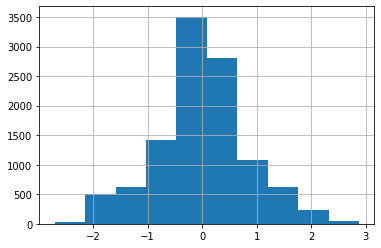

In [107]:
#Check the assumptions
#Mean residual is around zero
residuals = ypred - ytrain
print(residuals.mean())
residuals.hist()


((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-2.70611216, -2.51660928, -2.45410582, ...,  2.82822671,
          2.82848495,  2.87618989])),
 (0.835302002595851, 1.2481900725390073e-13, 0.993166754816966))

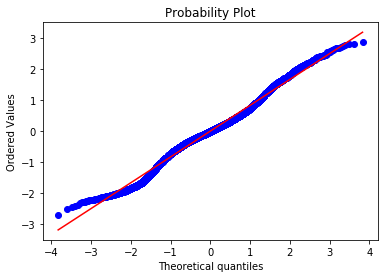

In [108]:
#Q-Q plot
probplot(residuals, plot=plt)

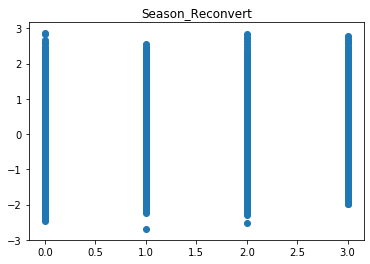

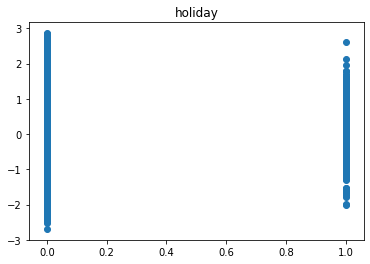

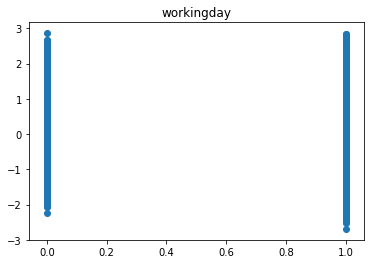

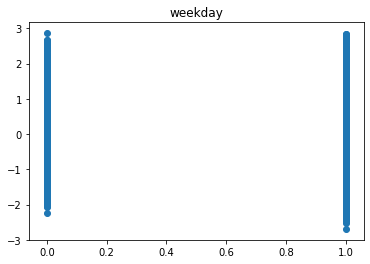

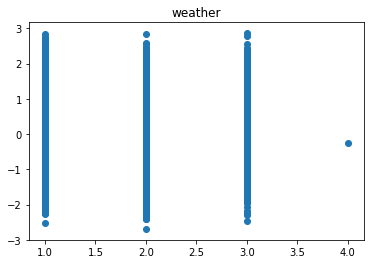

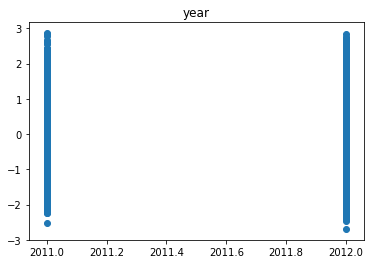

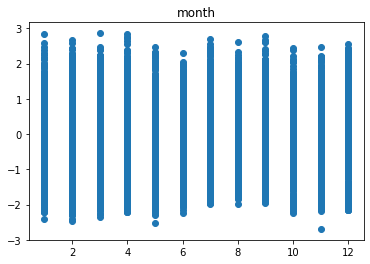

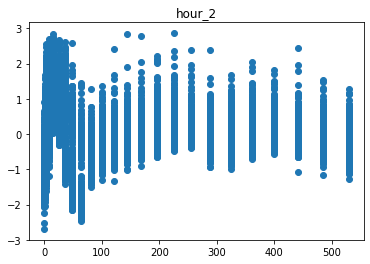

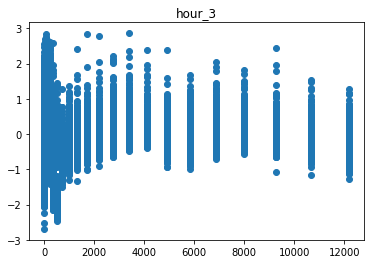

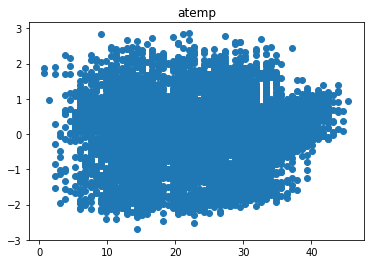

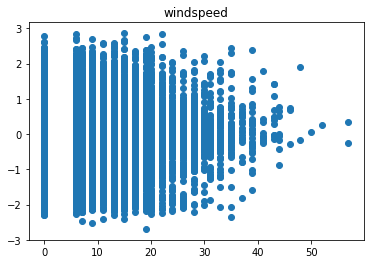

In [109]:
#Residuals uncorrelated with x and must be equally on and under 0

for column in Xtrain.columns:
    plt.scatter(Xtrain[column], residuals)
    plt.title(f'{column}')
    plt.show()
#plt.scatter(Xtrain, residuals)
#Xtrain.shape, residuals.shape